# bike 데이터를 이용한 보간법 활용

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('bike_sharing_daily.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [33]:
df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148.0,1362.0,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68.0,891.0,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54.0,768.0,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41.0,1280.0,1321


In [27]:
dfe = df.iloc[0:15, 9:]
dfe

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
5,0.204348,0.233209,0.518261,0.089565,88.0,1518.0,1606
6,0.196522,0.208839,0.498696,0.168726,148.0,1362.0,1510
7,0.165000,0.162254,0.535833,0.266804,68.0,891.0,959
8,0.138333,0.116175,0.434167,0.361950,54.0,768.0,822
9,0.150833,0.150888,0.482917,0.223267,41.0,1280.0,1321


# atemp 결측치

<Axes: >

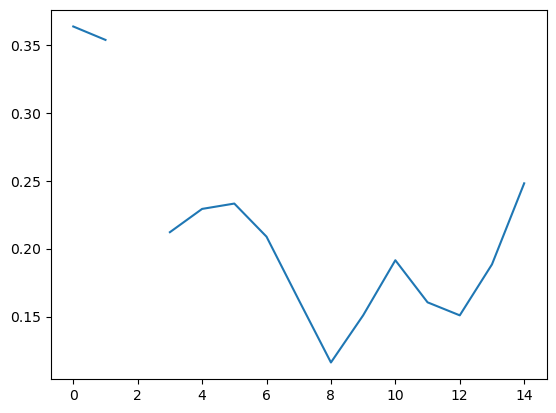

In [21]:
dfe['atemp'].plot()

In [22]:
df['atemp'].mean()

0.47467374356435643

<Axes: >

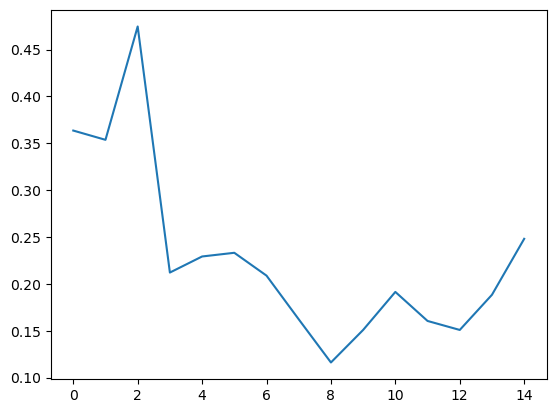

In [23]:
dfe['atemp'].fillna(0.47467374356435643).plot()

In [26]:
dfe['atemp'].interpolate().to_frame()

,atemp
0,0.363625
1,0.353739
2,0.282931
3,0.212122
4,0.229270
5,0.233209
6,0.208839
7,0.162254
8,0.116175
9,0.150888


<Axes: >

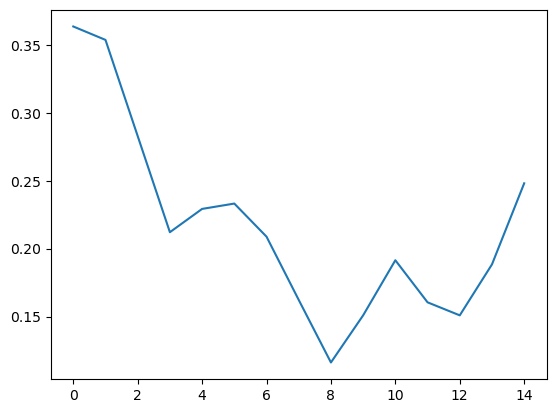

In [25]:
dfe['atemp'].interpolate().plot()

<Axes: >

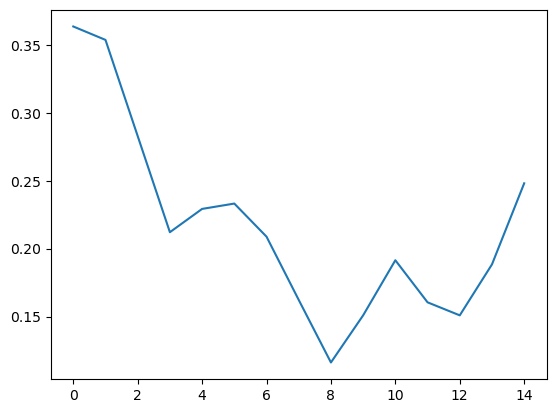

In [28]:
dfe['atemp'].interpolate(method = 'linear').plot() # 점 거리 측정이기 때문에 사이 값의 평균을 구하는 interpolate 기본값과 동일

<Axes: >

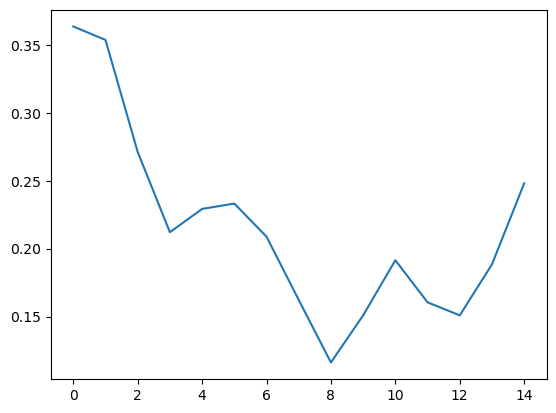

In [30]:
dfe['atemp'].interpolate(method = 'cubic').plot() # 선 모양이 굽은 것을 확인 # 3차식

# hum 결측치

In [ ]:
df2 = df.iloc[35:50, 9:]

In [37]:
df2['hum']

35    0.929167
36    0.568333
37    0.738333
38    0.537917
39    0.494783
40         NaN
41         NaN
42    0.544167
43    0.457391
44    0.375833
45    0.314348
46    0.423478
47    0.505000
48    0.516667
49    0.187917
Name: hum, dtype: float64

<Axes: >

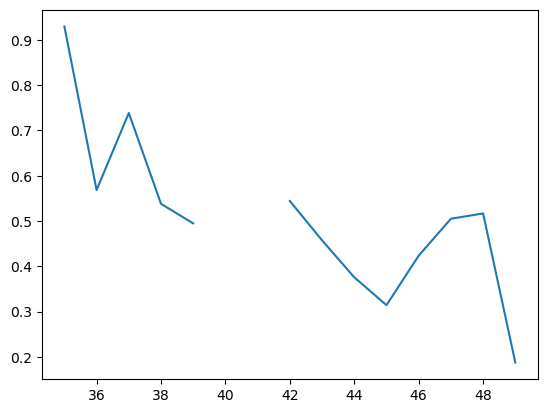

In [39]:
df2['hum'].plot()

<Axes: >

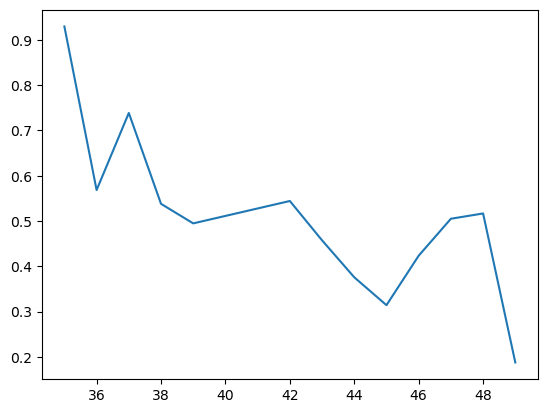

In [40]:
df2['hum'].interpolate().plot()

<Axes: >

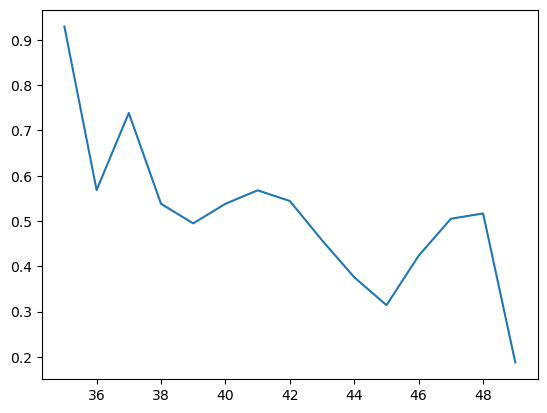

In [50]:
df2['hum'].interpolate(method = 'cubic').plot() # 결측치의 값 상승 # 결과 차트가 더 부드러움 # 조금 더 곡선의 모습을 띔

['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

<Axes: >

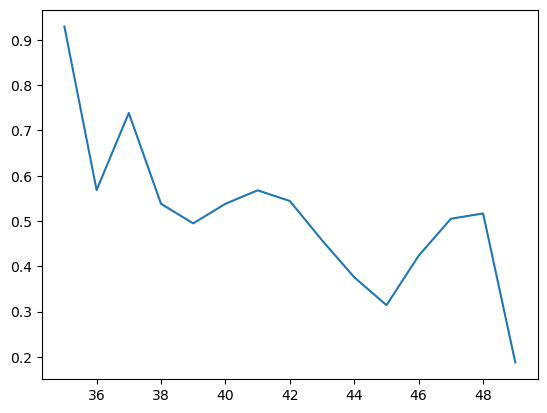

In [44]:
df2['hum'].interpolate(method = 'cubicspline').plot()

In [51]:
df2['hum'].interpolate(method = 'cubic')

35    0.929167
36    0.568333
37    0.738333
38    0.537917
39    0.494783
40    0.538064
41    0.567720
42    0.544167
43    0.457391
44    0.375833
45    0.314348
46    0.423478
47    0.505000
48    0.516667
49    0.187917
Name: hum, dtype: float64

In [52]:
df2['hum'].interpolate(method = 'cubicspline') # cubic 과 cubicspline은 결과값 차이가 없다

#40    0.538064
#41    0.567720

35    0.929167
36    0.568333
37    0.738333
38    0.537917
39    0.494783
40    0.538064
41    0.567720
42    0.544167
43    0.457391
44    0.375833
45    0.314348
46    0.423478
47    0.505000
48    0.516667
49    0.187917
Name: hum, dtype: float64

<Axes: >

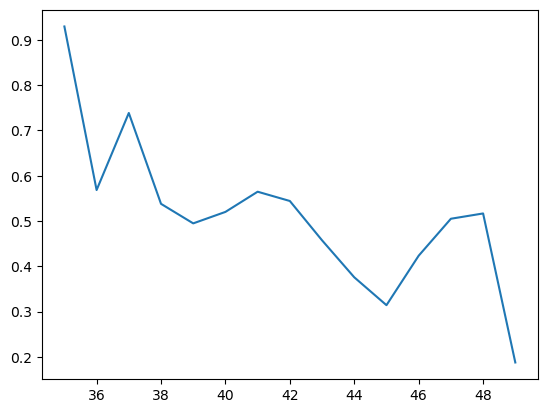

In [49]:
df2['hum'].interpolate(method = 'quadratic').plot()

In [53]:
df2['hum'].interpolate(method = 'quadratic')

#40    0.520099
#41    0.564644

35    0.929167
36    0.568333
37    0.738333
38    0.537917
39    0.494783
40    0.520099
41    0.564644
42    0.544167
43    0.457391
44    0.375833
45    0.314348
46    0.423478
47    0.505000
48    0.516667
49    0.187917
Name: hum, dtype: float64

- Linear > quadratic(이차) > cubic(삼차)
- 차수가 높아질수록 곡선이 부드러워짐

<Axes: >

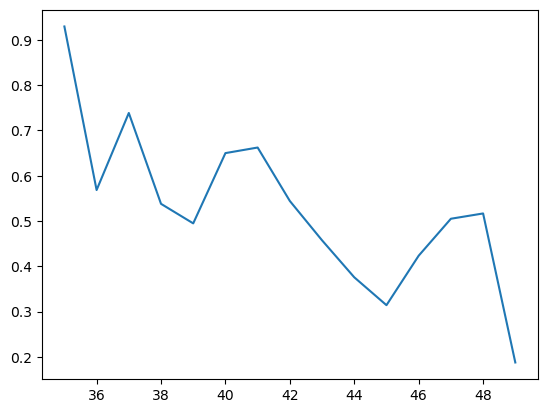

In [55]:
df2['hum'].interpolate(method = 'barycentric').plot() # 삼각형 무게중심

<Axes: >

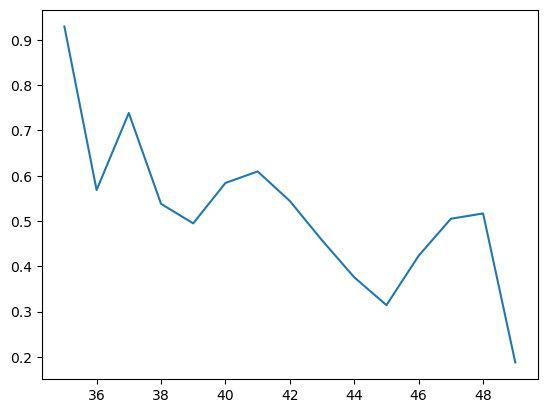

In [69]:
df2['hum'].interpolate(method='polynomial', order=5).plot() # 구간 전체를 다항식으로 # order는 몇항식으로 할건지 지정

<Axes: >

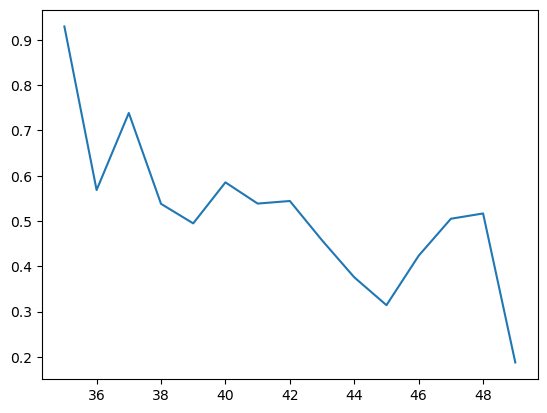

In [70]:
df2['hum'].interpolate(method = 'spline', order = 5).plot() # polynomial와 동일하게 order 지정 # order는 항식 지정